In [1]:
# Breast Cancer Analysis
# Editor: Kevin Mello
# Date: August 7th 2025

# Libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Data
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
# Cleaning the data

# Checking for missing values
missing_counts = df.isnull().sum()
print("Missing values per feature:\n", missing_counts)

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# If duplicates exist, remove them
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")

# Checking data types
print('\nData types:\n', df.dtypes)

print('\nSummary statistics:\n', df.describe())

Missing values per feature:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64
Number of duplicate rows: 0

Data types:
 mean radius      

Question 1:
What is the total number of tumor samples, and how many features describe each sample?
Visualization: Simple text output or table displaying total samples and feature count.

Expectation: There are 569 samples and 30 numeric features describing tumor characteristics.


In [3]:
total_samples = df.shape[0]
total_features = df.shape[1] - 1

summary_df = pd.DataFrame({
    "Description": ["Total tumor samples", "Number of features (excluding target)"],
    "Value": [total_samples, total_features]
})

print(f"Total tumor samples: {total_samples}")
print(f"Number of features per sample: {total_features}")

summary_df

Total tumor samples: 569
Number of features per sample: 30


,Description,Value
0,Total tumor samples,569
1,Number of features (excluding target),30


Question 2:
What is the distribution of tumor diagnosis classes (Malignant vs. Benign) in the dataset?

- Visualization: Pie chart showing proportions of Malignant and Benign samples.

- Expectation: Approximately 37% malignant and 63% benign tumors.

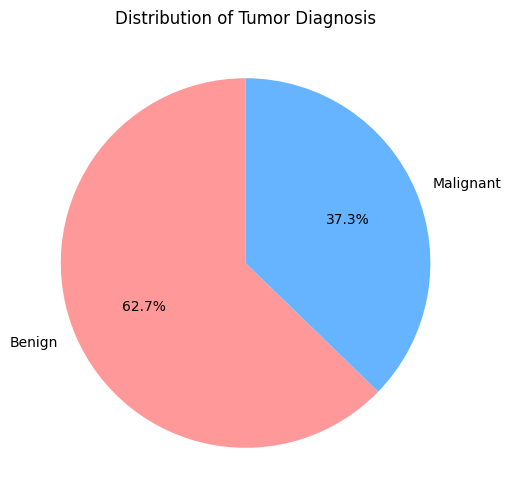

In [4]:
# mapping target
df['diagnosis'] = df['target'].map({0: 'Malignant', 1: 'Benign'})

# Count samples per diagnosis
diagnosis_counts = df['diagnosis'].value_counts()

ax = diagnosis_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999','#66b3ff'],
    figsize=(6,6),
    title='Distribution of Tumor Diagnosis'
)
ax.set_ylabel('')
plt.show()

Question 3:

Are there any missing or duplicate records in the dataset?

- Visualization: Text summary or bar chart showing counts of missing/duplicate values.

- Expectation: No missing values or duplicates, dataset is clean.

Total missing values in dataset: 0
Total duplicate rows in dataset: 0


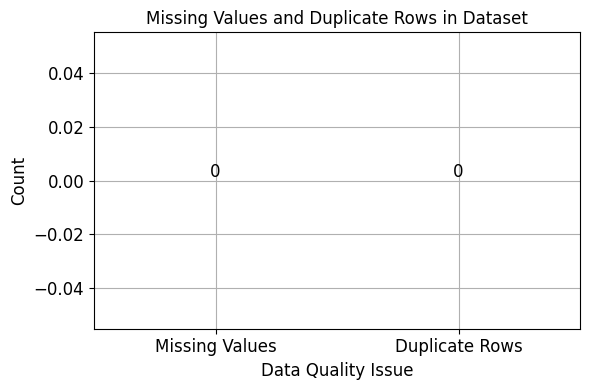

In [5]:
'''
This cell quickly quality checks the data and reports
and visually displays missing and duplicates in my data
'''
# Calculate total missing values and duplicates
total_missing = df.isnull().sum().sum()
total_duplicates = df.duplicated().sum()

# Print summary text
print(f"Total missing values in dataset: {total_missing}")
print(f"Total duplicate rows in dataset: {total_duplicates}")

# Prepare data for plotting
summary_counts = {'Missing Values': total_missing, 'Duplicate Rows': total_duplicates}
summary_series = pd.Series(summary_counts)

# Plot bar chart with styling
ax = summary_series.plot(
    kind='bar',
    color=['#FFA500', '#FF4500'],  # orange and red colors
    figsize=(6, 4),
    rot=0,  # horizontal x-axis labels
    fontsize=12,
    title='Missing Values and Duplicate Rows in Dataset',
    grid=True,
    position=0.5
)

# Axis labels
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Data Quality Issue', fontsize=12)

# Annotate bars with counts on top
for p in ax.patches:
    ax.annotate(
        str(p.get_height()), 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=12
    )

plt.tight_layout()
plt.show()

Question 4:
What is the average size (mean radius) of tumors in benign vs malignant classes?

- Visualization: Box plot or bar chart comparing mean radius across the two diagnosis classes.

- Expectation: Malignant tumors have a larger mean radius on average than benign tumors.

/var/folders/7w/16mnwyh943bgbqznf75wlz4c0000gn/T/ipykernel_1675/602427008.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='mean radius', data=df, palette=['#ff9999', '#66b3ff'])


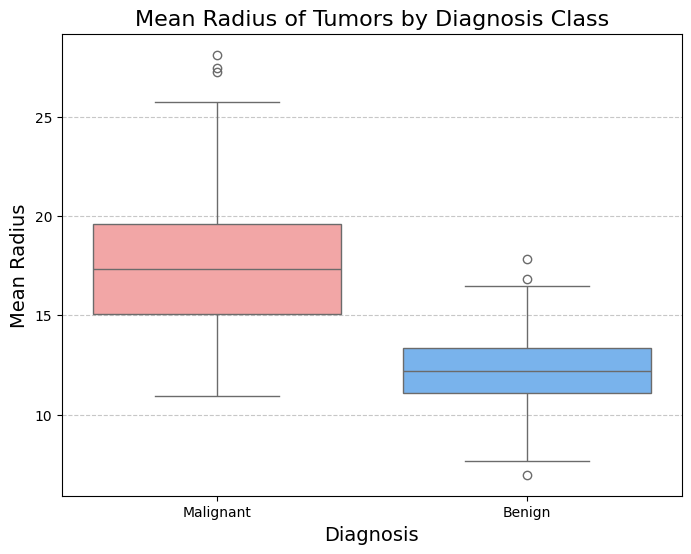

In [6]:
df['diagnosis'] = df['target'].map({0: 'Malignant', 1: 'Benign'})

plt.figure(figsize=(8,6))
sns.boxplot(x='diagnosis', y='mean radius', data=df, palette=['#ff9999', '#66b3ff'])

plt.title('Mean Radius of Tumors by Diagnosis Class', fontsize=16)
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Mean Radius', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()

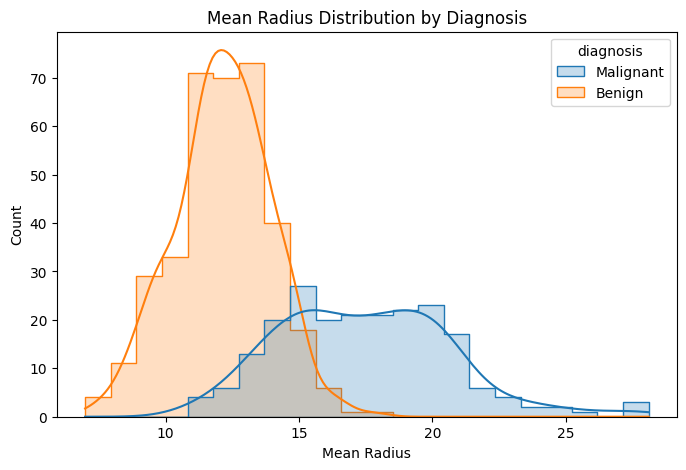

In [7]:
df['diagnosis'] = df['diagnosis'].astype(str)

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='mean radius', hue='diagnosis', kde=True, element="step")
plt.title("Mean Radius Distribution by Diagnosis")
plt.xlabel("Mean Radius")
plt.ylabel("Count")
plt.show()



Question 5:
Which tumor feature shows the highest variance across all samples?

- Visualization: Bar chart of feature variances highlighting the highest.

- Expectation: One of the texture or area-related features has the highest variance.

Feature with highest variance: worst area (324167.39)


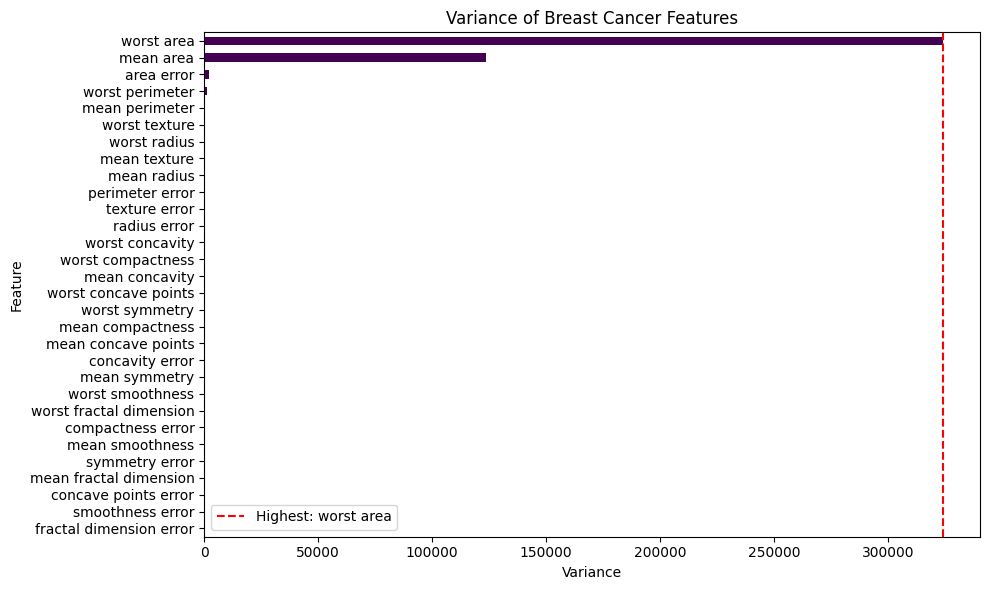

In [8]:
# Question 5: Which tumor feature shows the highest variance?

# Calculate variances (excluding target & diagnosis)
feature_variances = df.drop(columns=['target', 'diagnosis']).var().sort_values(ascending=False)

# Identify the highest variance feature
highest_variance_feature = feature_variances.idxmax()
highest_variance_value = feature_variances.max()
print(f"Feature with highest variance: {highest_variance_feature} ({highest_variance_value:.2f})")

# Plot bar chart
ax = feature_variances.plot(
    kind='barh',
    figsize=(10, 6),
    colormap='viridis',
    title='Variance of Breast Cancer Features'
)

# Highlight the highest variance feature with a vertical line
ax.axvline(highest_variance_value, color='red', linestyle='--',
           label=f'Highest: {highest_variance_feature}')
ax.set_xlabel('Variance')
ax.set_ylabel('Feature')
ax.legend()
ax.invert_yaxis()  # Put highest on top
plt.tight_layout()
plt.show()


Question 6:
What is the distribution shape of the mean texture feature? (e.g., skewness)

- Visualization: Histogram with a kernel density estimate (KDE) curve for mean texture.

- Expectation: The distribution may be right-skewed (positive skew) indicating more samples with lower texture values.

Skewness of 'mean texture': 0.65


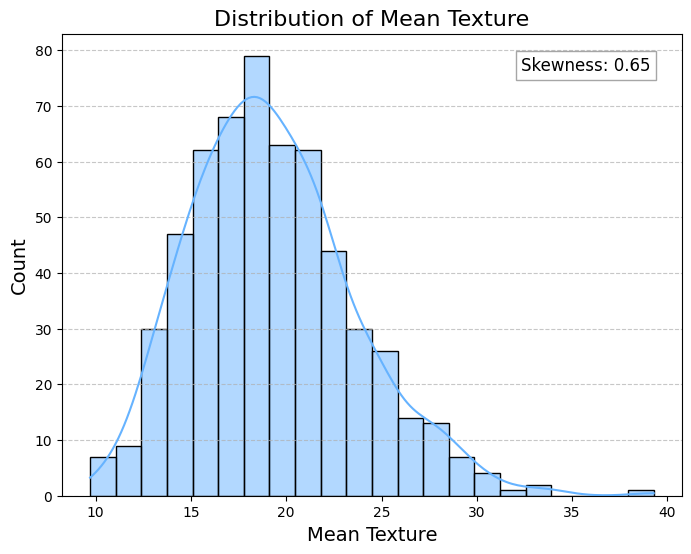

In [9]:
# Question 6: Distribution shape of 'mean texture'

# Calculate skewness
mean_texture_skew = df['mean texture'].skew()
print(f"Skewness of 'mean texture': {mean_texture_skew:.2f}")

# Plot histogram with KDE
plt.figure(figsize=(8, 6))
sns.histplot(
    df['mean texture'],
    kde=True,
    color='#66b3ff',
    edgecolor='black'
)

plt.title("Distribution of Mean Texture", fontsize=16)
plt.xlabel("Mean Texture", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Annotate skewness on plot
plt.text(
    0.95, 0.95,
    f"Skewness: {mean_texture_skew:.2f}",
    transform=plt.gca().transAxes,
    ha='right', va='top',
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
)

plt.show()


Question 7:
Is there a strong correlation between mean area and mean perimeter features?

- Visualization: Scatter plot with regression line showing mean area vs mean perimeter.

- Expectation: Strong positive correlation; as perimeter increases, area increases.


Correlation between mean area and mean perimeter: 0.99


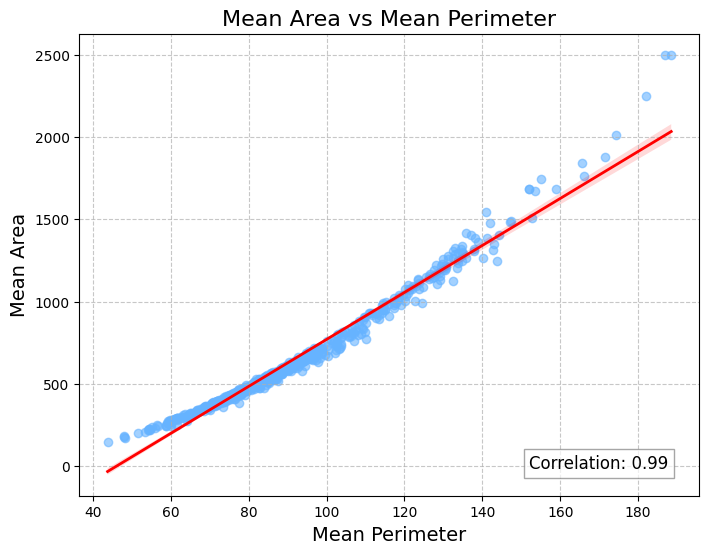

In [10]:
# Question 7: Correlation between 'mean area' and 'mean perimeter'

# Calculate correlation
correlation = df['mean area'].corr(df['mean perimeter'])
print(f"Correlation between mean area and mean perimeter: {correlation:.2f}")

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(
    x='mean perimeter',
    y='mean area',
    data=df,
    scatter_kws={'alpha': 0.6, 'color': '#66b3ff'},
    line_kws={'color': 'red', 'lw': 2}
)

plt.title("Mean Area vs Mean Perimeter", fontsize=16)
plt.xlabel("Mean Perimeter", fontsize=14)
plt.ylabel("Mean Area", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate correlation on plot
plt.text(
    0.95, 0.05,
    f"Correlation: {correlation:.2f}",
    transform=plt.gca().transAxes,
    ha='right', va='bottom',
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
)

plt.show()


Question 8:
Can tumor samples be visually separated into benign and malignant clusters using two principal components?

- Visualization: 2D scatter plot of the first two PCA components, color-coded by diagnosis.

- Expectation: Clear clustering/separation of benign vs malignant tumors in PCA space.


Explained variance by PC1: 44.27%
Explained variance by PC2: 18.97%


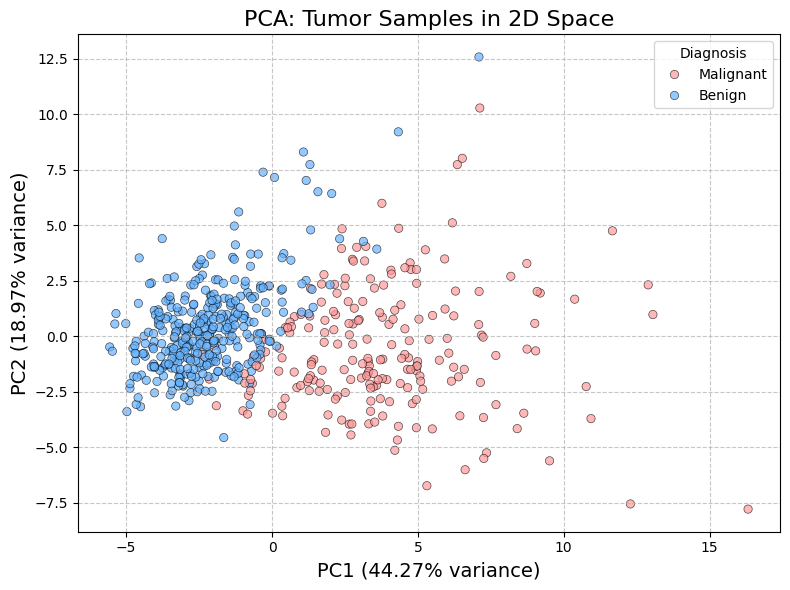

In [11]:
# Standardize features (excluding target & diagnosis)
features = df.drop(columns=['target', 'diagnosis'])
scaled_features = StandardScaler().fit_transform(features)

# Perform PCA (2 components)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create DataFrame for PCA results
pca_df = pd.DataFrame(
    data=pca_result,
    columns=['PC1', 'PC2']
)
pca_df['diagnosis'] = df['diagnosis']

# Explained variance
explained_var = pca.explained_variance_ratio_ * 100
print(f"Explained variance by PC1: {explained_var[0]:.2f}%")
print(f"Explained variance by PC2: {explained_var[1]:.2f}%")

# Scatter plot of PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='diagnosis',
    palette={'Benign': '#66b3ff', 'Malignant': '#ff9999'},
    data=pca_df,
    alpha=0.7,
    edgecolor='k'
)

plt.title("PCA: Tumor Samples in 2D Space", fontsize=16)
plt.xlabel(f"PC1 ({explained_var[0]:.2f}% variance)", fontsize=14)
plt.ylabel(f"PC2 ({explained_var[1]:.2f}% variance)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()

Question 9:
Which features contribute most to predicting tumor diagnosis based on a Random Forest model?

- Visualization: Horizontal bar chart showing top 5 feature importances from the model.

- Expectation: Features like mean concavity, mean perimeter, or mean texture are among the top predictors.

Top 5 features by importance:
worst area              0.153892
worst concave points    0.144663
mean concave points     0.106210
worst radius            0.077987
mean concavity          0.068001
dtype: float64


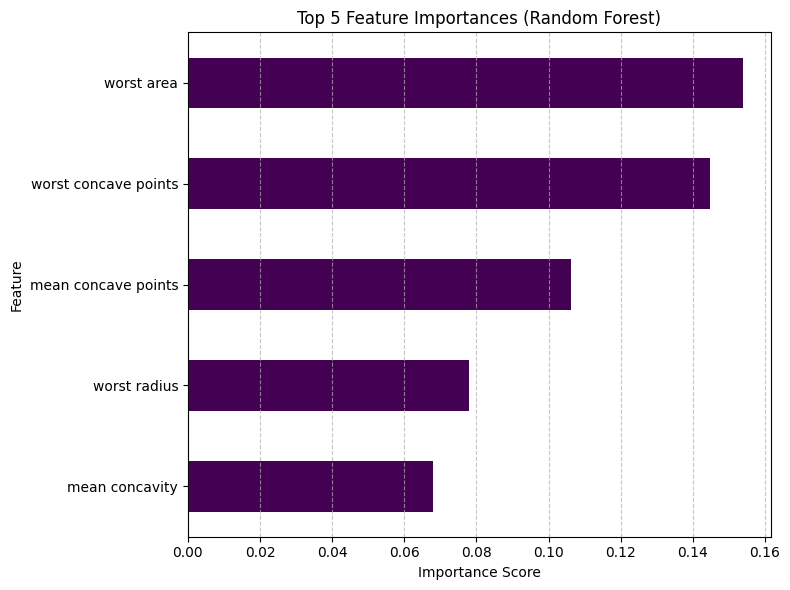

In [12]:
# Features and target
X = df.drop(columns=['target', 'diagnosis'])
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature importances
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top5_importances = importances.sort_values(ascending=False).head(5)

# Print top features
print("Top 5 features by importance:")
print(top5_importances)

# Plot top 5 feature importances
ax = top5_importances.sort_values().plot(
    kind='barh',
    figsize=(8, 6),
    colormap='viridis',
    title='Top 5 Feature Importances (Random Forest)'
)

ax.set_xlabel('Importance Score')
ax.set_ylabel('Feature')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Question 10:
How accurate is the Random Forest model in classifying malignant vs benign tumors?

- Visualization: Classification report summary (precision, recall, f1-score) presented as a  table or heatmap.

- Expectation: The model achieves high accuracy (~95%+), with strong precision and recall for both classes.

Classification Report:
               precision    recall  f1-score     support
Malignant      0.975610  0.930233  0.952381   43.000000
Benign         0.958904  0.985915  0.972222   71.000000
accuracy       0.964912  0.964912  0.964912    0.964912
macro avg      0.967257  0.958074  0.962302  114.000000
weighted avg   0.965205  0.964912  0.964738  114.000000


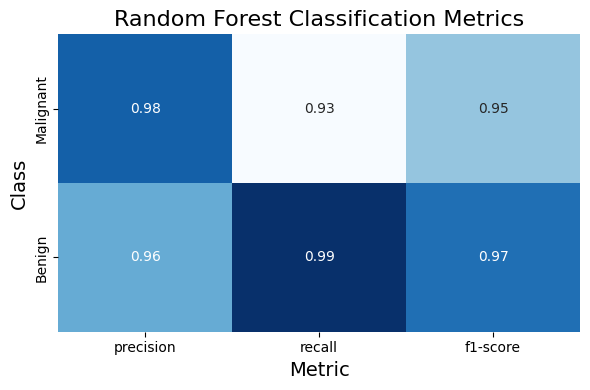

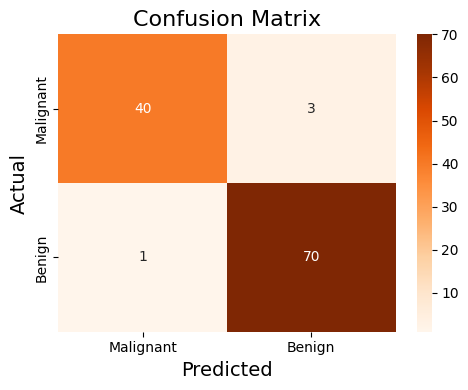

In [13]:
# Predictions
y_pred = rf_model.predict(X_test)

# Classification report
report_dict = classification_report(y_test, y_pred, target_names=['Malignant', 'Benign'], output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

print("Classification Report:\n", report_df)

# Heatmap for precision, recall, f1-score (excluding 'accuracy' row)
metrics_df = report_df.drop(index=['accuracy', 'macro avg', 'weighted avg'])
plt.figure(figsize=(6, 4))
sns.heatmap(
    metrics_df.iloc[:, :3],  # precision, recall, f1-score
    annot=True,
    cmap='Blues',
    fmt=".2f",
    cbar=False
)
plt.title("Random Forest Classification Metrics", fontsize=16)
plt.xlabel("Metric", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.tight_layout()
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.tight_layout()
plt.show()

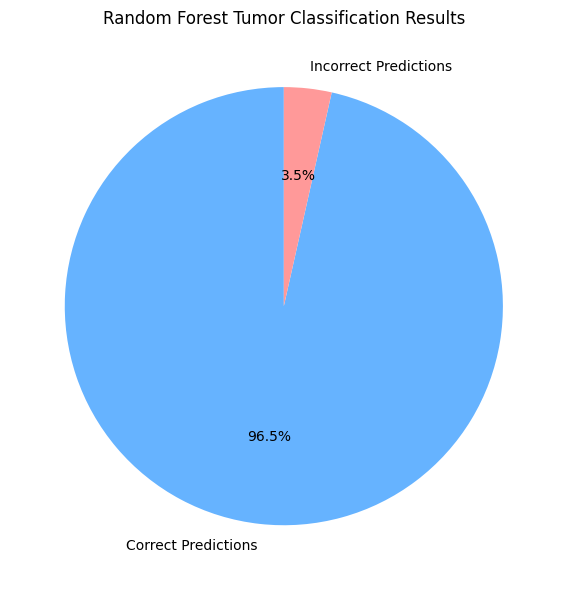

Conclusion:
Our model correctly classified 110 out of 114 tumor samples (96.49% accuracy).
This high accuracy suggests the model could be a helpful screening tool, but incorrect predictions show the need for further medical testing.


In [14]:
# Conclusion: Overall model prediction accuracy visualization

# Get prediction correctness
correct_predictions = (y_pred == y_test).sum()
incorrect_predictions = (y_pred != y_test).sum()

# Prepare data for pie chart
prediction_counts = pd.Series(
    [correct_predictions, incorrect_predictions],
    index=['Correct Predictions', 'Incorrect Predictions']
)

# Plot pie chart
colors = ['#66b3ff', '#ff9999']
ax = prediction_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    figsize=(6, 6),
    title='Random Forest Tumor Classification Results'
)
ax.set_ylabel('')  # Remove y-axis label
plt.tight_layout()
plt.show()

# Print simple takeaway
print("Conclusion:")
print(f"Our model correctly classified {correct_predictions} out of {len(y_test)} tumor samples "
      f"({(correct_predictions/len(y_test))*100:.2f}% accuracy).")
print("This high accuracy suggests the model could be a helpful screening tool, "
      "but incorrect predictions show the need for further medical testing.")
